In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import date, timedelta

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set_style('whitegrid')

# pd.option_context('mode.use_inf_as_na', True)
pd.options.display.float_format = '{:,.3f}'.format
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [2]:
control_df = pd.read_csv("C:/Users/praja/Downloads/ABTest/control_group.csv", sep =";")

control_df['Date'] = pd.to_datetime(control_df['Date'], dayfirst=True)
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,"82,702.000","56,930.000","7,016.000","2,290.000","2,159.000","1,819.000",618.000
1,Control Campaign,2019-08-02,1757,"121,040.000","102,513.000","8,110.000","2,033.000","1,841.000","1,219.000",511.000
2,Control Campaign,2019-08-03,2343,"131,711.000","110,862.000","6,508.000","1,737.000","1,549.000","1,134.000",372.000
3,Control Campaign,2019-08-04,1940,"72,878.000","61,235.000","3,065.000","1,042.000",982.000,"1,183.000",340.000
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
test_df = pd.read_csv("C:/Users/praja/Downloads/ABTest/test_group.csv" ,sep =";")

# test_df['Date'] = pd.to_datetime(test_df['Date'], dayfirst=True)
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [4]:
column_names = ['Campaign Name', 'Date', 'Amount Spent', 'Impressions', 
                'Unique Impressions', 'Clicks', 'Number of Searches', 
                'Page Views', 'Add to Carts', 'Purchases']

In [5]:
control_df.columns = column_names

control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Campaign Name       30 non-null     object        
 1   Date                30 non-null     datetime64[ns]
 2   Amount Spent        30 non-null     int64         
 3   Impressions         29 non-null     float64       
 4   Unique Impressions  29 non-null     float64       
 5   Clicks              29 non-null     float64       
 6   Number of Searches  29 non-null     float64       
 7   Page Views          29 non-null     float64       
 8   Add to Carts        29 non-null     float64       
 9   Purchases           29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [6]:
control_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,30,2019-08-15 12:00:00,2019-08-01 00:00:00,2019-08-08 06:00:00,2019-08-15 12:00:00,2019-08-22 18:00:00,2019-08-30 00:00:00,NaN
Amount Spent,30.000,"2,288.433","1,757.000","1,945.500","2,299.500","2,532.000","3,083.000",367.334
Impressions,29.000,"109,559.759","71,274.000","92,029.000","113,430.000","121,332.000","145,248.000","21,688.923"
Unique Impressions,29.000,"88,844.931","42,859.000","74,192.000","91,579.000","102,479.000","127,852.000","21,832.350"
Clicks,29.000,"5,320.793","2,277.000","4,085.000","5,224.000","6,628.000","8,137.000","1,757.369"
Number of Searches,29.000,"2,221.310","1,001.000","1,615.000","2,390.000","2,711.000","4,891.000",866.089
Page Views,29.000,"1,943.793",848.000,"1,249.000","1,984.000","2,421.000","4,219.000",777.545
Add to Carts,29.000,"1,300.000",442.000,930.000,"1,339.000","1,641.000","1,913.000",407.458
Purchases,29.000,522.793,222.000,372.000,501.000,670.000,800.000,185.029


In [7]:
control_df.isnull().sum()

Campaign Name         0
Date                  0
Amount Spent          0
Impressions           1
Unique Impressions    1
Clicks                1
Number of Searches    1
Page Views            1
Add to Carts          1
Purchases             1
dtype: int64

In [8]:
test_df.columns = column_names

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Campaign Name       30 non-null     object
 1   Date                30 non-null     object
 2   Amount Spent        30 non-null     int64 
 3   Impressions         30 non-null     int64 
 4   Unique Impressions  30 non-null     int64 
 5   Clicks              30 non-null     int64 
 6   Number of Searches  30 non-null     int64 
 7   Page Views          30 non-null     int64 
 8   Add to Carts        30 non-null     int64 
 9   Purchases           30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [9]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount Spent,30.000,"2,563.067",348.688,"1,968.000","2,324.500","2,584.000","2,836.250","3,112.000"
Impressions,30.000,"74,584.800","32,121.377","22,521.000","47,541.250","68,853.500","99,500.000","133,771.000"
Unique Impressions,30.000,"53,491.567","28,795.776","10,598.000","31,516.250","44,219.500","78,778.750","109,834.000"
Clicks,30.000,"6,032.333","1,708.567","3,038.000","4,407.000","6,242.500","7,604.750","8,264.000"
Number of Searches,30.000,"2,418.967",388.742,"1,854.000","2,043.000","2,395.500","2,801.250","2,978.000"
Page Views,30.000,"1,858.000",597.655,858.000,"1,320.000","1,881.000","2,412.000","2,801.000"
Add to Carts,30.000,881.533,347.584,278.000,582.500,974.000,"1,148.500","1,391.000"
Purchases,30.000,521.233,211.048,238.000,298.000,500.000,701.000,890.000


In [10]:
test_df.isnull().sum()

Campaign Name         0
Date                  0
Amount Spent          0
Impressions           0
Unique Impressions    0
Clicks                0
Number of Searches    0
Page Views            0
Add to Carts          0
Purchases             0
dtype: int64

In [11]:
# Handle the missing values in control_df
control_df.iloc[:, 3:] = control_df.iloc[:, 3:].fillna(control_df.iloc[:, 3:].median())

# Convert the datatypes:
for column in control_df.columns[3:]:
    control_df[column] = control_df[column].round().astype('int64')

control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Campaign Name       30 non-null     object        
 1   Date                30 non-null     datetime64[ns]
 2   Amount Spent        30 non-null     int64         
 3   Impressions         30 non-null     int64         
 4   Unique Impressions  30 non-null     int64         
 5   Clicks              30 non-null     int64         
 6   Number of Searches  30 non-null     int64         
 7   Page Views          30 non-null     int64         
 8   Add to Carts        30 non-null     int64         
 9   Purchases           30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


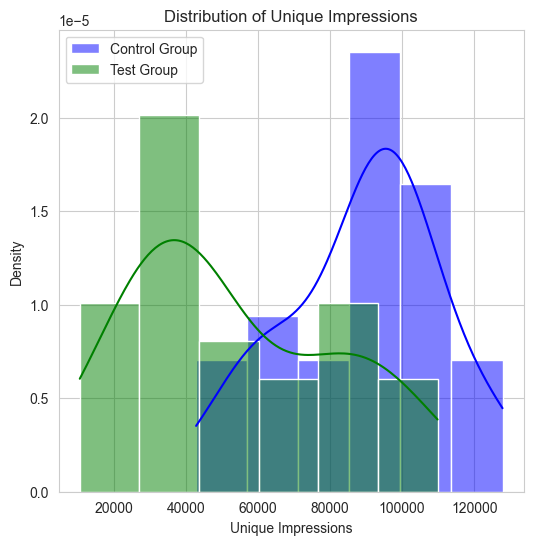

In [12]:
# Plot Distribution of Unique Impressions
plt.figure(figsize=(6, 6))
sns.histplot(control_df['Unique Impressions'], color='blue', label='Control Group', kde=True, stat="density")
sns.histplot(test_df['Unique Impressions'], color='green', label='Test Group', kde=True, stat="density")
plt.title('Distribution of Unique Impressions')
plt.xlabel('Unique Impressions')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

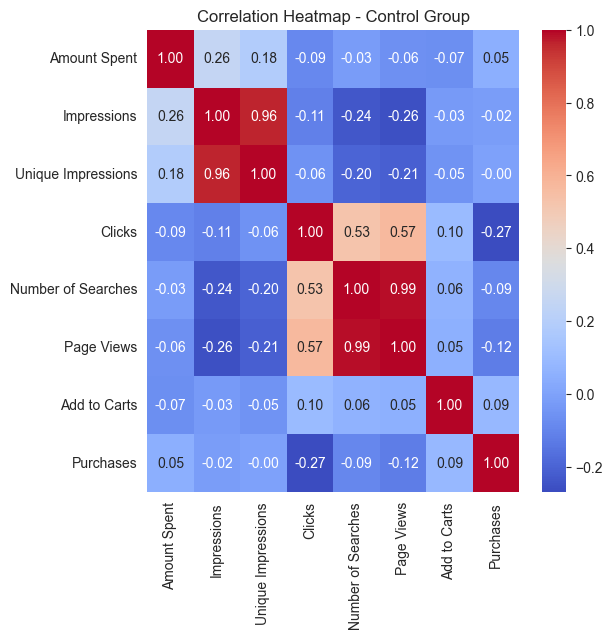

In [13]:
# Plot Correlation Heatmaps for both datasets
plt.figure(figsize=(6, 6))
sns.heatmap(control_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Control Group')
plt.show()

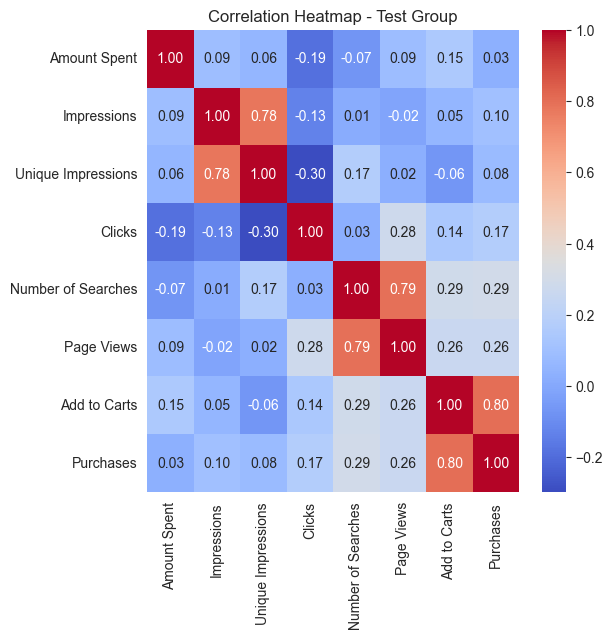

In [14]:
plt.figure(figsize=(6, 6))
sns.heatmap(test_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Test Group')
plt.show()

In [15]:
# Concat the two dataframes
ab_data = pd.concat([control_df, test_df])

ab_data.head()

,Campaign Name,Date,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases
0,Control Campaign,2019-08-01 00:00:00,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2019-08-02 00:00:00,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,2019-08-03 00:00:00,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,2019-08-04 00:00:00,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,2019-08-05 00:00:00,1835,113430,91579,5224,2390,1984,1339,501


In [16]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Campaign Name       60 non-null     object
 1   Date                60 non-null     object
 2   Amount Spent        60 non-null     int64 
 3   Impressions         60 non-null     int64 
 4   Unique Impressions  60 non-null     int64 
 5   Clicks              60 non-null     int64 
 6   Number of Searches  60 non-null     int64 
 7   Page Views          60 non-null     int64 
 8   Add to Carts        60 non-null     int64 
 9   Purchases           60 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 5.2+ KB


In [17]:
ab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount Spent,60.000,"2,425.750",381.130,"1,757.000","2,073.750","2,420.500","2,727.500","3,112.000"
Impressions,60.000,"92,136.783","32,309.933","22,521.000","69,558.250","98,281.000","117,160.500","145,248.000"
Unique Impressions,60.000,"71,213.817","30,875.601","10,598.000","43,235.500","77,422.000","95,314.250","127,852.000"
Clicks,60.000,"5,674.950","1,740.850","2,277.000","4,230.750","5,581.000","7,201.250","8,264.000"
Number of Searches,60.000,"2,322.950",663.405,"1,001.000","1,970.750","2,390.000","2,755.750","4,891.000"
Page Views,60.000,"1,901.567",681.501,848.000,"1,249.000","1,979.500","2,422.500","4,219.000"
Add to Carts,60.000,"1,091.417",427.781,278.000,863.250,"1,082.500","1,384.250","1,913.000"
Purchases,60.000,521.650,195.316,222.000,340.000,501.000,685.000,890.000


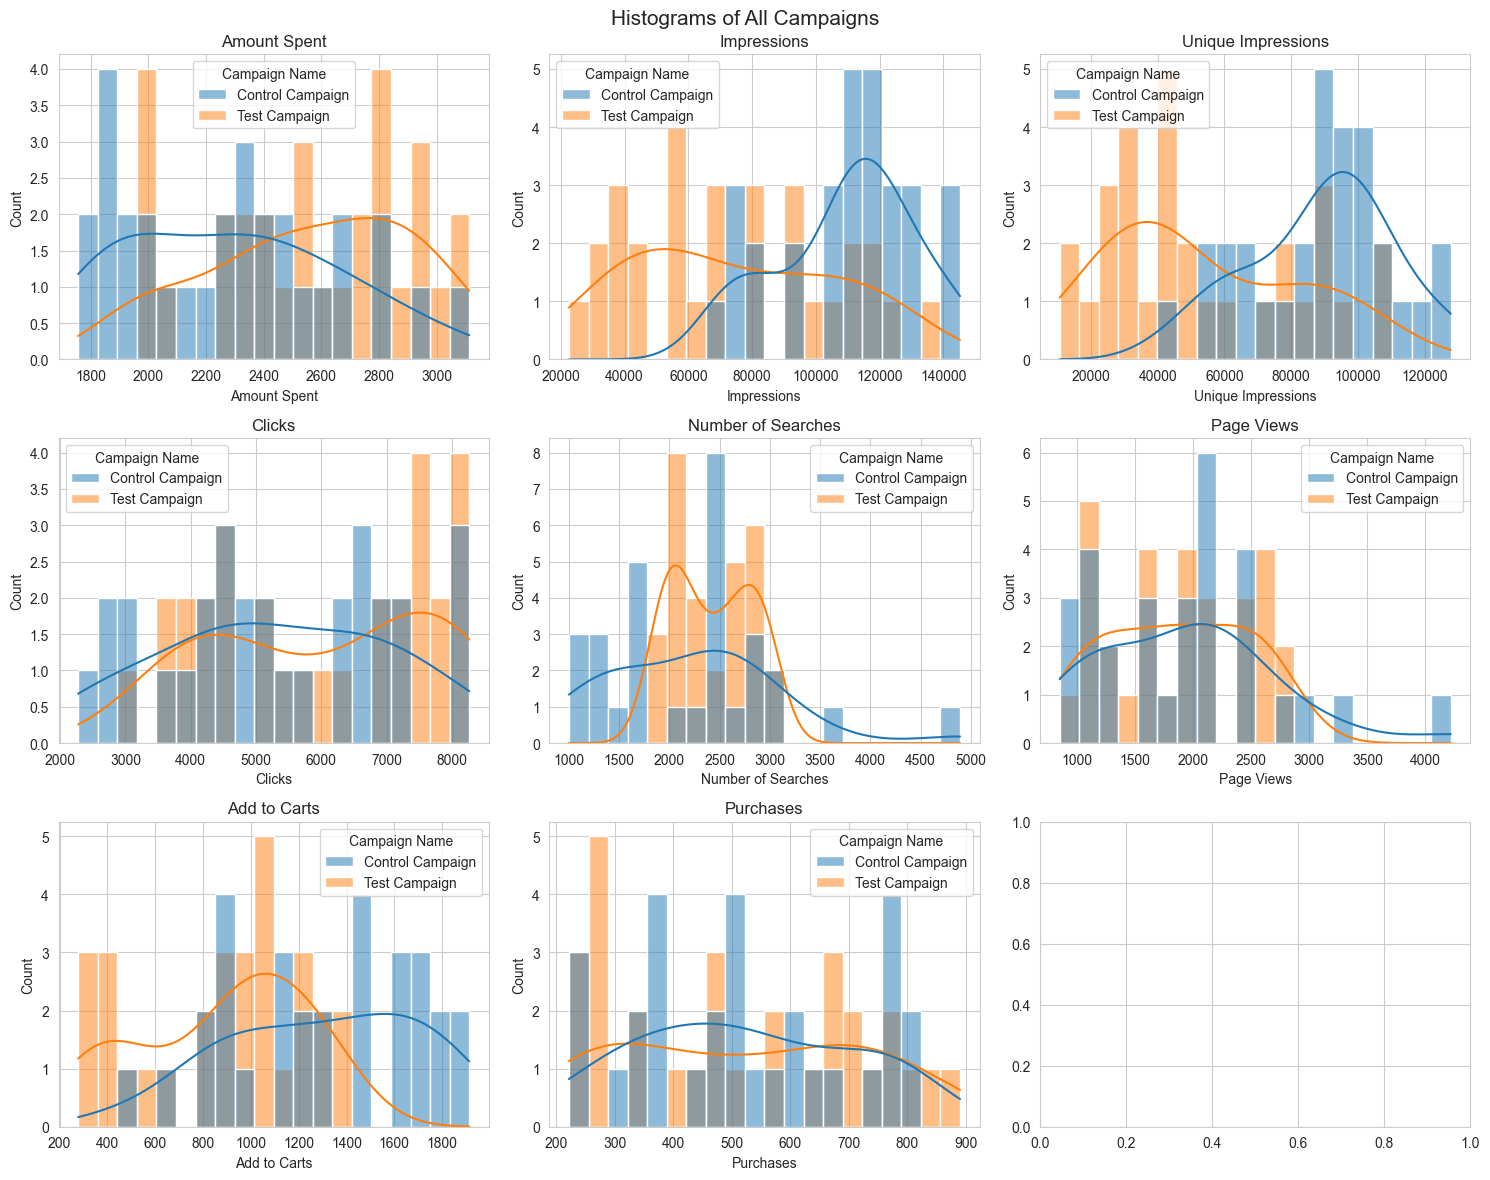

In [18]:
# Histograms of all campaigns
fig, axes = plt.subplots(3, 3, figsize=(15, 12), dpi=100)

for i, col in enumerate(ab_data.columns[2:], 1):
    if col != 'Campaign Name':
        plt.subplot(3, 3, i)
    
        sns.histplot(data=ab_data, x=col, bins=20, hue='Campaign Name', kde=True)
        plt.title(f'{col}')

plt.suptitle('Histograms of All Campaigns', fontsize=15)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

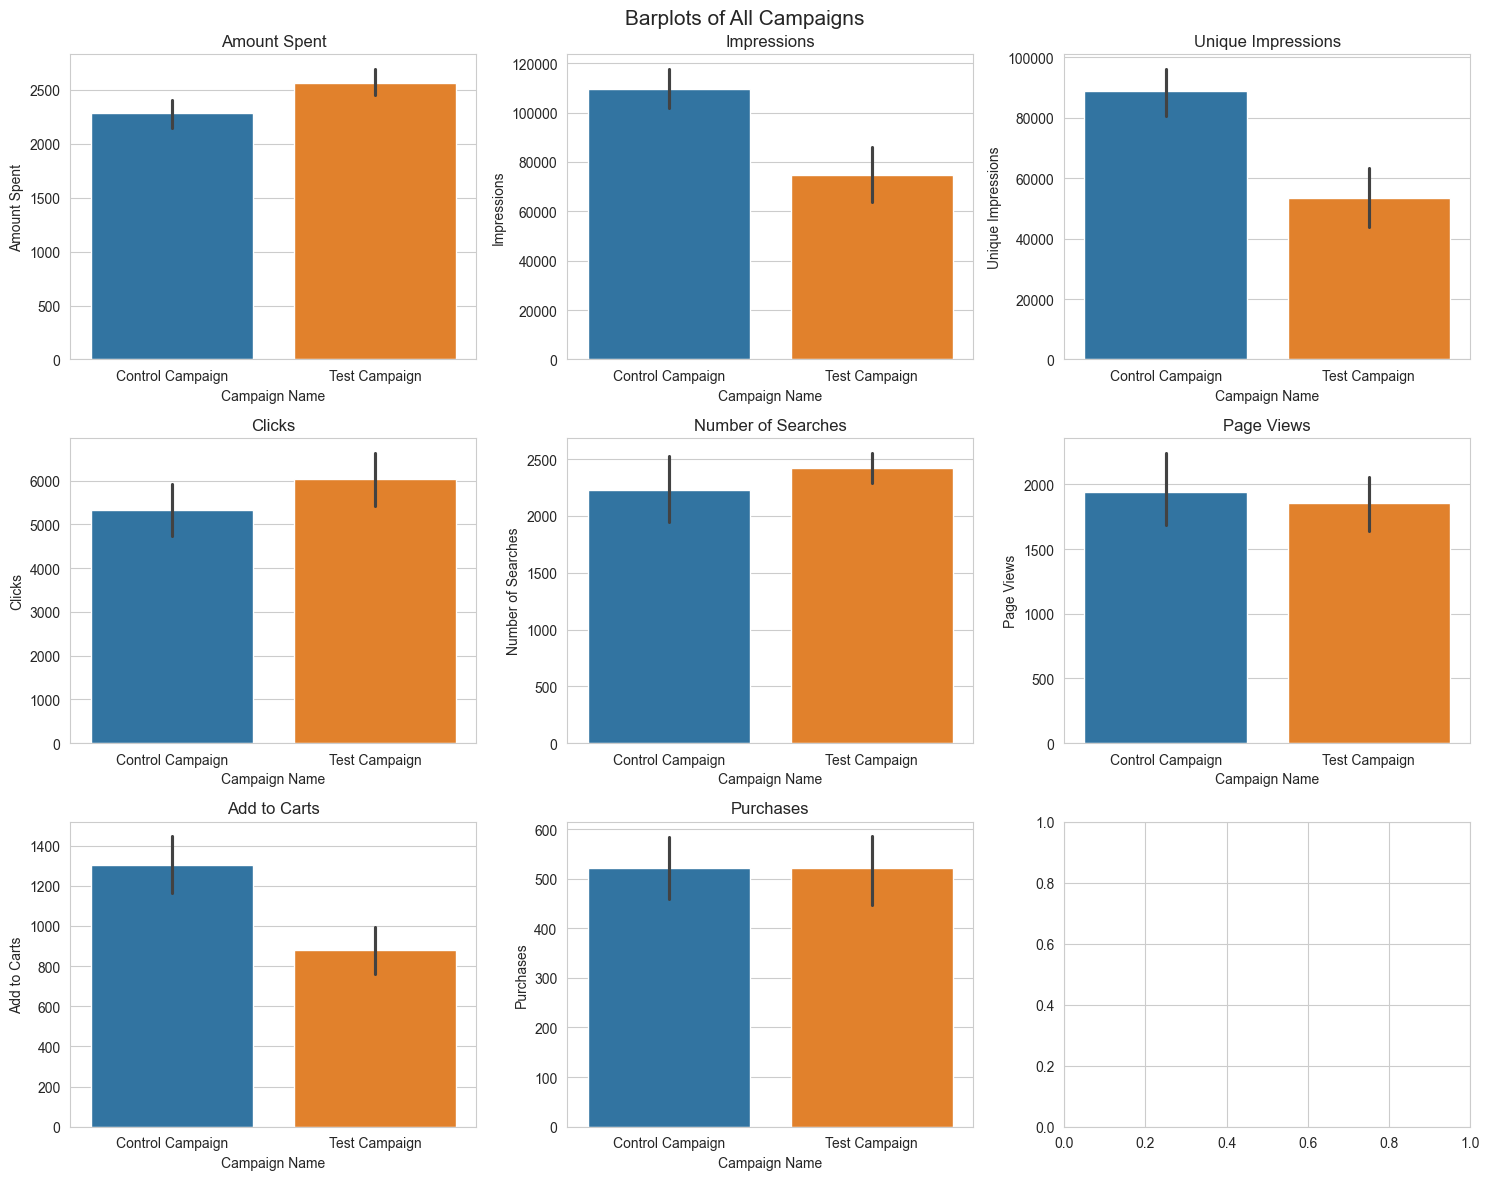

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, col in enumerate(ab_data.columns[2:],1):

    if col != 'Date':
        ax = plt.subplot(3, 3, i)
        sns.barplot(data=ab_data, x='Campaign Name', 
                    y=col, hue='Campaign Name', dodge=False)
        ax.set_title(f'{col}')
        plt.legend().remove()

plt.suptitle('Barplots of All Campaigns', fontsize=15)
plt.subplots_adjust(hspace = 0.6, wspace=0.2)

plt.tight_layout()
plt.show()

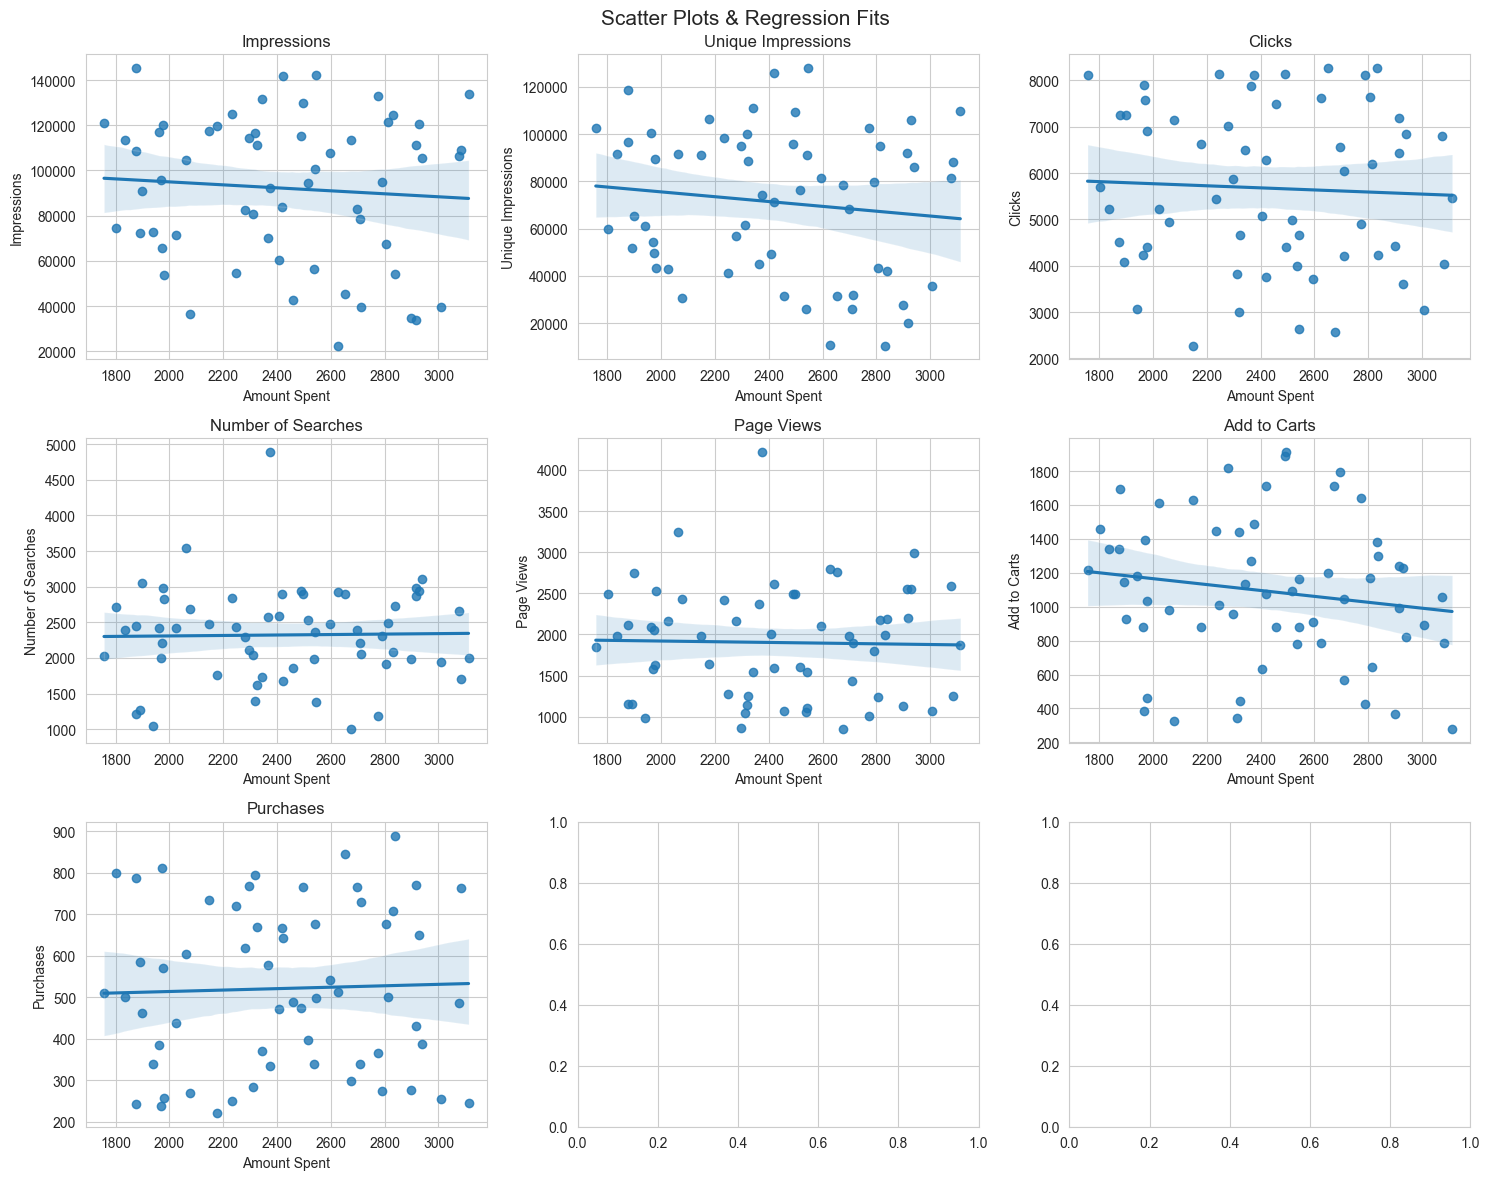

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12), dpi=100)

# Plotting the columns
for i, col in enumerate(ab_data.columns[3:], 1):
    
    ax = plt.subplot(3, 3, i)
    
    sns.regplot(data=ab_data, x='Amount Spent', 
                y=col, ax=ax, x_jitter=0.1, )
    ax.set_title(f'{col}')

plt.suptitle('Scatter Plots & Regression Fits', fontsize=15)
plt.tight_layout()
plt.show()

In [21]:
# Create function to add hues to the scatter & reg plots
def hue_regplot(data, x, y, hue, palette=None, ax=None, **kwargs):
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = sns.color_palette('tab10', len(levels))
        palette = {k: default_colors[i] for i, k in enumerate(levels)}
    
    for key in levels:
        sns.regplot(
            x=x,
            y=y,
            data=data[data[hue] == key],
            color=palette[key],
            ax=ax,
            **kwargs
        )
    

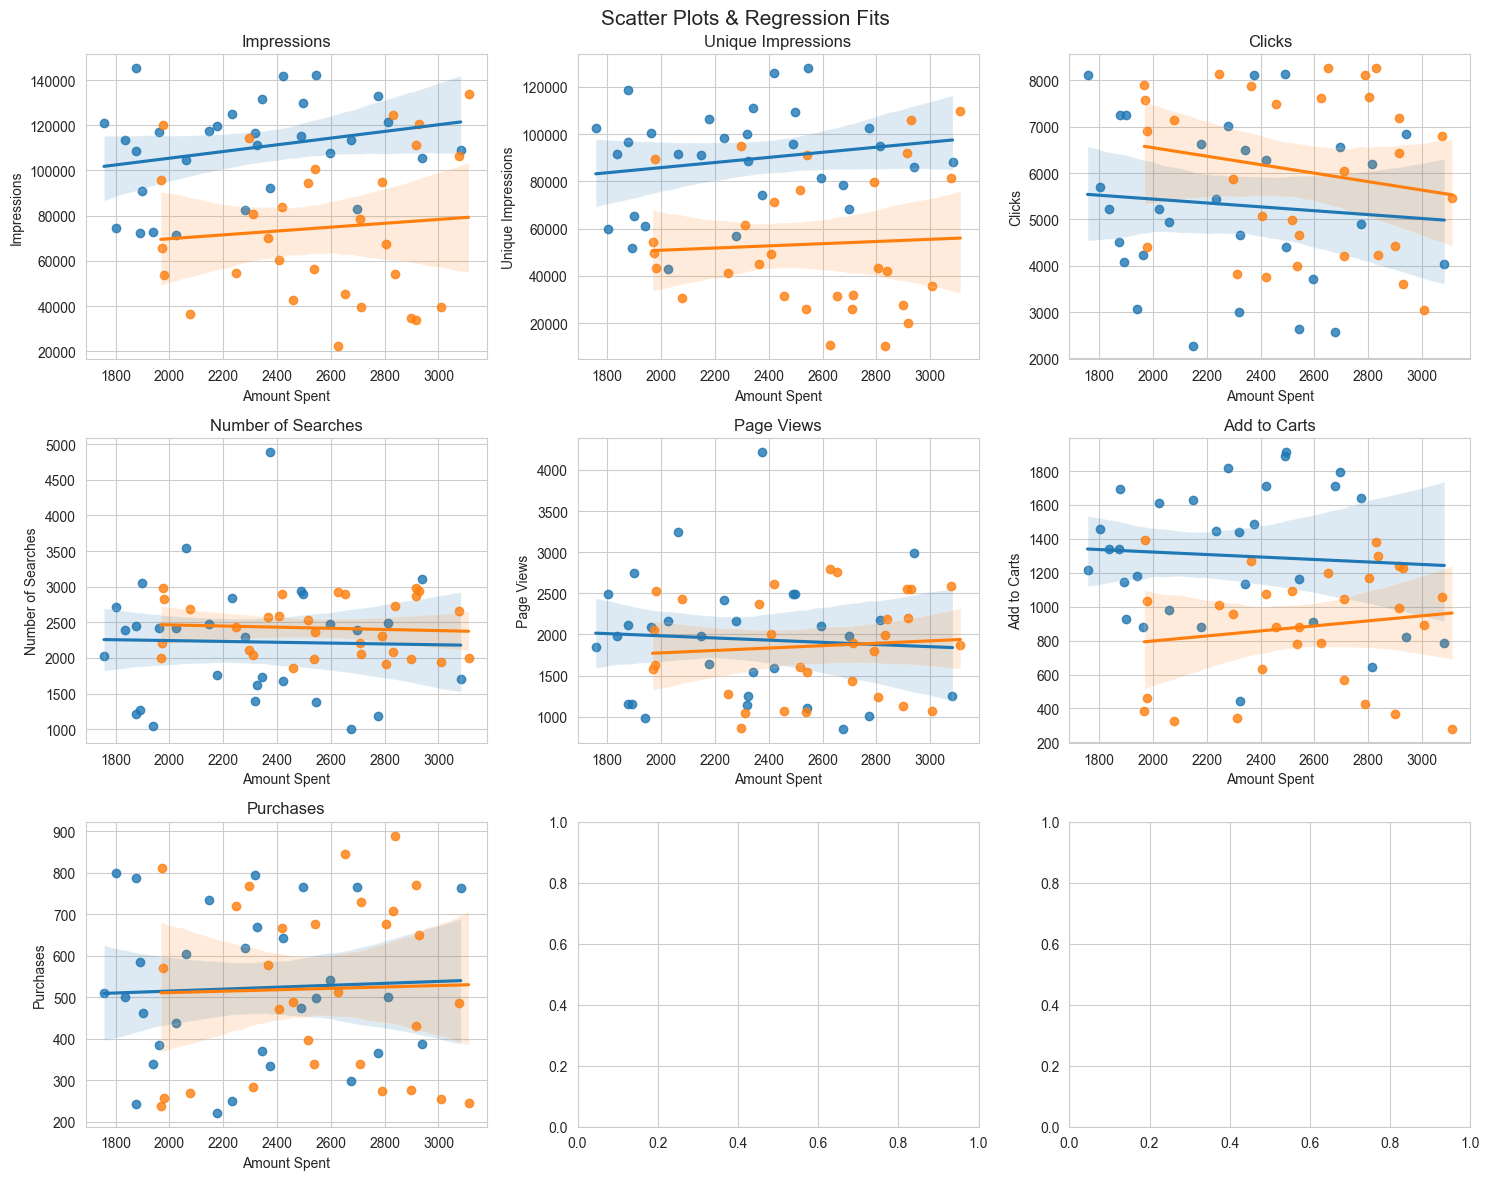

In [22]:
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12), dpi=100)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over columns and create the regplots
for i, col in enumerate(ab_data.columns[3:], 0):
    hue_regplot(data=ab_data, x='Amount Spent', y=col, 
                hue='Campaign Name', ax=axes[i], x_jitter=0.1)
    axes[i].set_title(f'{col}')

plt.suptitle('Scatter Plots & Regression Fits', fontsize=15)
plt.tight_layout() 
plt.show()

In [23]:
# Drop the 'Date' column before performing groupby and mean
campaign_means = ab_data.drop(columns='Date').groupby('Campaign Name').mean().reset_index()

campaign_means

,Campaign Name,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases
0,Control Campaign,"2,288.433","109,688.767","88,936.067","5,317.567","2,226.933","1,945.133","1,301.300",522.067
1,Test Campaign,"2,563.067","74,584.800","53,491.567","6,032.333","2,418.967","1,858.000",881.533,521.233


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

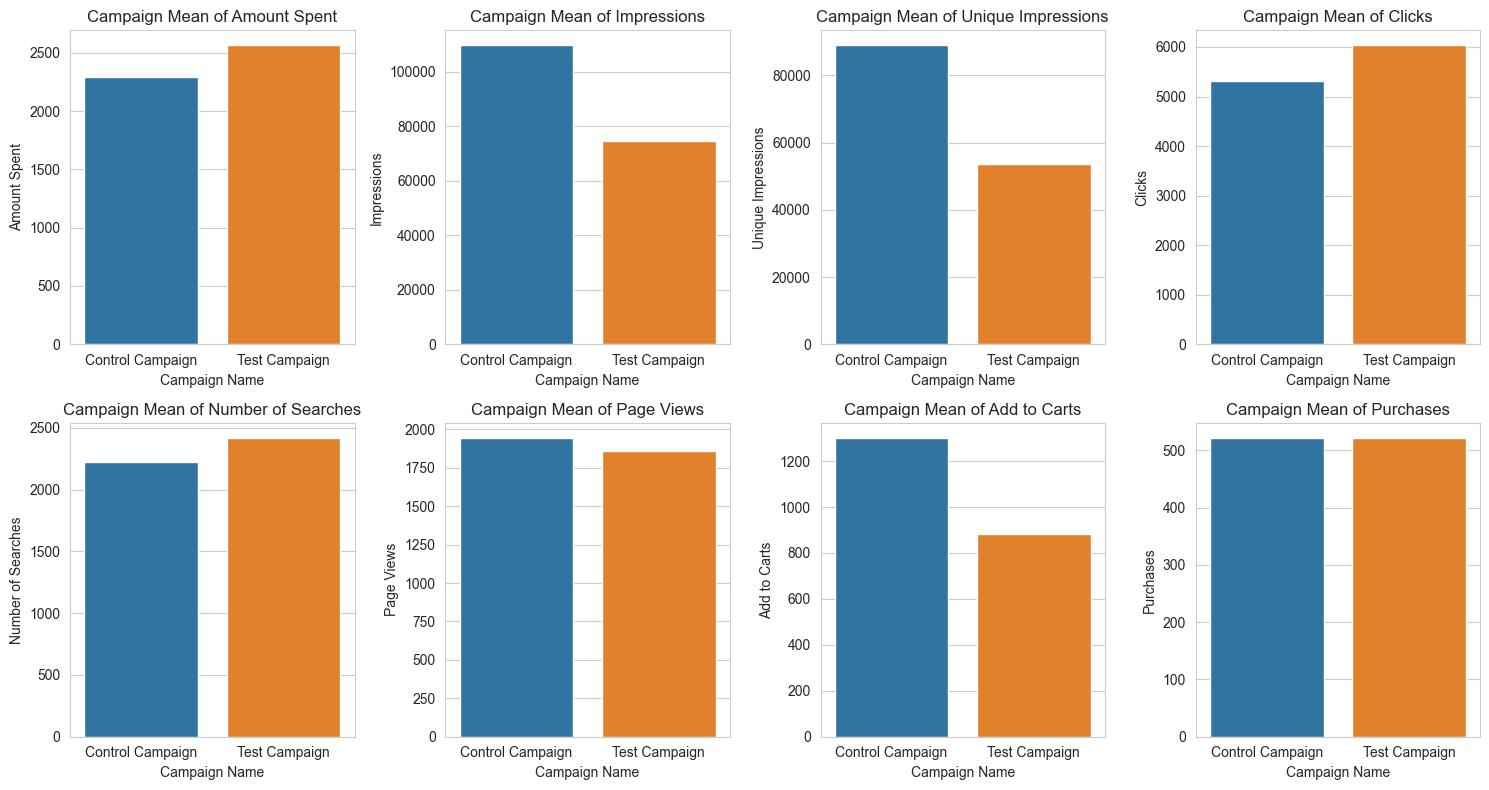

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for i, col in enumerate(campaign_means.columns):
    
    if col != 'Campaign Name':
        plt.subplot(2, 4, i)
        ax = sns.barplot(data=campaign_means, x='Campaign Name', 
                         y=col, hue='Campaign Name', dodge=False)
        ax.set_title(f'Campaign Mean of {col}')
        plt.legend().remove()

plt.tight_layout()
plt.show()

In [25]:
# Mann-Whitney U Test
results = {}

for col in ab_data.columns[3:]:
    control = ab_data[ab_data['Campaign Name'] == 'Control Campaign'][col]
    test = ab_data[ab_data['Campaign Name'] == 'Test Campaign'][col]
    stat, p = mannwhitneyu(control, test)
    results[col] = {'Statistic': stat, 'p-value': p}

ht_df = pd.DataFrame(results).T
ht_df

,Statistic,p-value
Impressions,722.000,0.000
Unique Impressions,745.000,0.000
Clicks,349.000,0.137
Number of Searches,361.000,0.191
Page Views,458.000,0.912
Add to Carts,692.000,0.000
Purchases,454.000,0.959


In [26]:
# Perform two-sample t-test
results = {}

for col in ab_data.columns[3:]:
    control = ab_data[ab_data['Campaign Name'] == 'Control Campaign'][col]
    test = ab_data[ab_data['Campaign Name'] == 'Test Campaign'][col]
    stat, p = ttest_ind(control, test, alternative='two-sided')
    results[col] = {'Statistic': stat, 'p-value': p}

ht_df = pd.DataFrame(results).T
ht_df

,Statistic,p-value
Impressions,4.987,0.000
Unique Impressions,5.406,0.000
Clicks,-1.612,0.112
Number of Searches,-1.124,0.266
Page Views,0.492,0.625
Add to Carts,4.336,0.000
Purchases,0.016,0.987


In [27]:
ab_data['CTR'] = ab_data['Clicks'] / ab_data['Impressions']
ab_data['CR'] = ab_data['Purchases'] / ab_data['Clicks']
ab_data['CPC'] = ab_data['Amount Spent'] / ab_data['Clicks']
ab_data['CPM'] = (ab_data['Amount Spent'] / ab_data['Impressions']) * 1000
ab_data['CPA'] = ab_data['Amount Spent'] / ab_data['Purchases']
ab_data['Engage Rate'] = ab_data['Add to Carts'] / ab_data['Impressions']
# ab_data['Page Views Per Visitor'] = ab_data['Page Views'] / ab_data['Unique Impressions']

# Display the updated dataframe with the new metrics
ab_data.head()

,Campaign Name,Date,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases,CTR,CR,CPC,CPM,CPA,Engage Rate
0,Control Campaign,2019-08-01 00:00:00,2280,82702,56930,7016,2290,2159,1819,618,0.085,0.088,0.325,27.569,3.689,0.022
1,Control Campaign,2019-08-02 00:00:00,1757,121040,102513,8110,2033,1841,1219,511,0.067,0.063,0.217,14.516,3.438,0.010
2,Control Campaign,2019-08-03 00:00:00,2343,131711,110862,6508,1737,1549,1134,372,0.049,0.057,0.360,17.789,6.298,0.009
3,Control Campaign,2019-08-04 00:00:00,1940,72878,61235,3065,1042,982,1183,340,0.042,0.111,0.633,26.620,5.706,0.016
4,Control Campaign,2019-08-05 00:00:00,1835,113430,91579,5224,2390,1984,1339,501,0.046,0.096,0.351,16.177,3.663,0.012


In [28]:
# Aggregate metrics by campaigns
metrics = ['CTR', 'CR', 'CPC', 'CPM', 'CPA', 'Engage Rate']

average_metrics = ab_data.groupby('Campaign Name')[metrics].mean().reset_index()
average_metrics

,Campaign Name,CTR,CR,CPC,CPM,CPA,Engage Rate
0,Control Campaign,0.051,0.114,0.490,21.531,5.006,0.012
1,Test Campaign,0.102,0.092,0.469,42.681,5.900,0.014


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


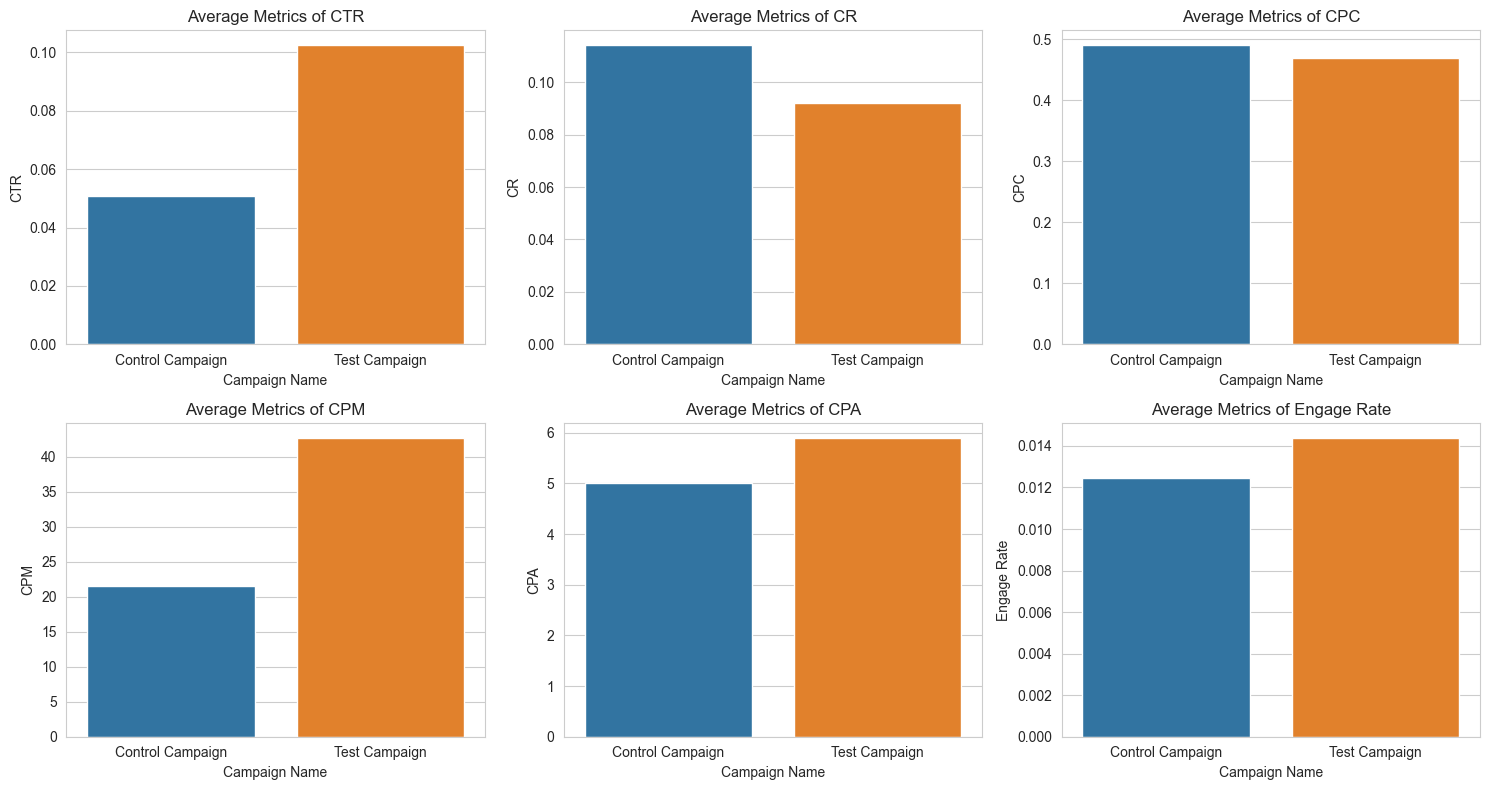

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, col in enumerate(average_metrics.columns):
    
    if col != 'Campaign Name':
        plt.subplot(2, 3, i)
        sns.barplot(data=average_metrics, x='Campaign Name', 
                    y=col, hue='Campaign Name', dodge=False)
        plt.title(f'Average Metrics of {col}')
        plt.legend().remove()

plt.tight_layout()
plt.show()

In [30]:
# Perform the Mann-Whitney U Test
results = {}

for metric in metrics:
    control = ab_data[ab_data['Campaign Name'] == 'Control Campaign'][metric]
    test = ab_data[ab_data['Campaign Name'] == 'Test Campaign'][metric]
    stat, p = mannwhitneyu(control, test)
    results[metric] = {'Statistic': stat, 'p-value': p}

ht_df = pd.DataFrame(results).T
ht_df

,Statistic,p-value
CTR,197.000,0.000
CR,523.000,0.284
CPC,461.000,0.877
CPM,114.000,0.000
CPA,369.000,0.234
Engage Rate,422.000,0.684


In [31]:
# Perform the two-sample t-test
results = {}

for metric in metrics:
    control = ab_data[ab_data['Campaign Name'] == 'Control Campaign'][metric]
    test = ab_data[ab_data['Campaign Name'] == 'Test Campaign'][metric]
    stat, p = ttest_ind(control, test, alternative='two-sided')
    results[metric] = {'Statistic': stat, 'p-value': p}

ht_df = pd.DataFrame(results).T
ht_df

,Statistic,p-value
CTR,-4.002,0.000
CR,1.482,0.144
CPC,0.415,0.680
CPM,-4.782,0.000
CPA,-1.399,0.167
Engage Rate,-1.050,0.298
